In [1]:
import os
from pyFlammarion import FmFiles, FmFlattening, FmPlotting
from pyFlammarion.FileLoaders.FlammarionFile import FlammarionFile
 
 
folder_path = r"S:\Research\Chip Fabrication Meeting Notes (Do not share without permission)\SharedData\AFM\W087\A2"  # Replace with your actual folder path
saveFlattened= False
 

Found 10 .mi files
Processing file: N1_240924_151047.mi


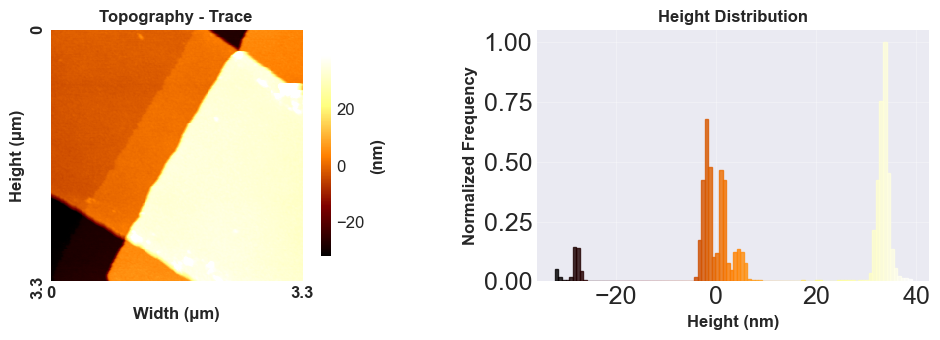


Processing file: N1_240924_152135.mi


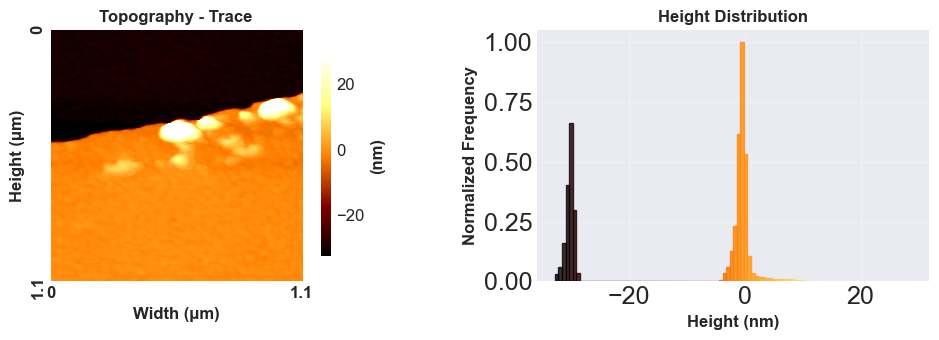


Processing file: pssivation_240924_140209.mi


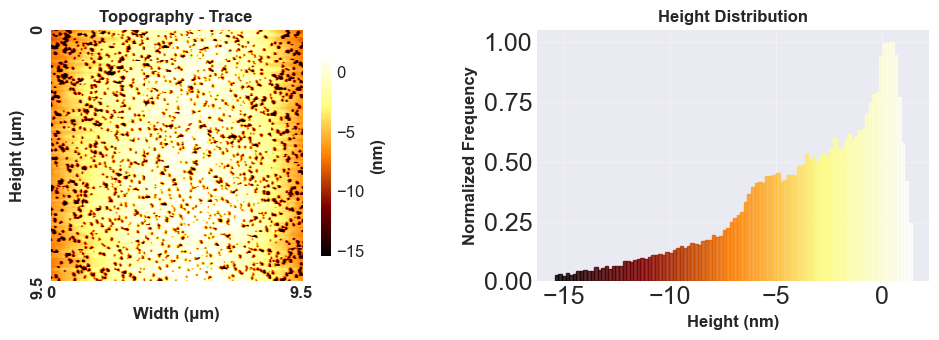

In [ ]:
# Example usage
mi_files =FmFiles.get_all_files(folder_path,'.mi', recursive=True)
print(f"Found {len(mi_files)} .mi files")

cc=0
for mi_file in mi_files:
    print(f"Processing file: { os.path.basename( mi_file)}")
    images:FlammarionFile = FmFiles.loadFile(mi_file)

    terraceFlat = FmFlattening.FlattenImage(images["Topography_Trace"] , FmFlattening.AFMFlatteningMethod.TrimmedMeanOfDifferenceLine)
    terraceFlat = FmFlattening.FlattenImage(terraceFlat,  FmFlattening.AFMFlatteningMethod.TerracePlanes,sectionPercent=5, polyDegree=4, limitPercent=0.6 )
    terraceFlat = FmFlattening.FlattenImage(terraceFlat, FmFlattening.AFMFlatteningMethod.ZeroFloor)    
    
    newFile =images.shallowCopy(False)
    newFile["Topography_Trace"] = terraceFlat

    FmPlotting.AFMPlot(terraceFlat, show_histogram=True, figsize=(5, 3.5))
    if saveFlattened:
        newFileName =os.path.join(folder_path, os.path.basename(mi_file).split('.')[0]+ '.gwy')
        print(f"Saving new file: {newFileName}")
        FmFiles.saveFile( newFileName ,newFile)
    print("")
    cc+=1
     
     
      